In [34]:
"""
Filename:- CreditCardFraudDetection.ipynb
CSC535 Final project
Coded By:-
Shannon Groth
Khaled Hossain
Mohammed Alduris
"""

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

data = pd.read_csv('creditcard.csv')

In [12]:
sampleData = data.sample(frac=0.5)
sampleData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179998,124333.0,-0.928194,0.738480,-0.032193,-0.320081,0.279276,-0.263373,0.389675,0.473972,0.111281,...,0.233183,0.822285,-0.196748,-0.441139,-0.052402,-0.120705,0.183889,0.144778,29.99,0
255073,157054.0,-0.623637,0.390129,0.738396,0.865550,1.225422,0.139376,0.818535,-0.201388,0.280222,...,0.087562,0.907710,-0.234744,0.702330,-0.135880,-0.443118,0.217983,-0.054551,28.00,0
6545,7926.0,1.376331,-0.562092,0.507086,-0.434519,-0.890864,-0.276486,-0.815210,-0.029039,0.741348,...,-0.152492,-0.177956,-0.063812,-0.048406,0.518384,-0.277060,-0.023056,-0.008562,10.00,0
201978,134120.0,1.983298,-0.038825,-1.784943,0.309318,0.208418,-0.805712,-0.007913,-0.084251,0.888829,...,-0.229502,-0.482335,0.122388,-0.552185,-0.068872,-0.082761,-0.015593,-0.031745,20.39,0
268893,163435.0,-0.805038,0.585762,-0.090319,0.310244,0.205206,-0.464729,0.145778,0.499457,0.566135,...,0.310020,1.106403,-0.218447,1.072931,0.419607,0.080625,0.218752,0.015007,49.16,0


In [13]:
sampleData.count()

Time      142404
V1        142404
V2        142404
V3        142404
V4        142404
V5        142404
V6        142404
V7        142404
V8        142404
V9        142404
V10       142404
V11       142404
V12       142404
V13       142404
V14       142404
V15       142404
V16       142404
V17       142404
V18       142404
V19       142404
V20       142404
V21       142404
V22       142404
V23       142404
V24       142404
V25       142404
V26       142404
V27       142404
V28       142404
Amount    142404
Class     142404
dtype: int64

In [14]:
sampleData = sampleData.drop(['Time'], axis = 1)
sampleData.count()

V1        142404
V2        142404
V3        142404
V4        142404
V5        142404
V6        142404
V7        142404
V8        142404
V9        142404
V10       142404
V11       142404
V12       142404
V13       142404
V14       142404
V15       142404
V16       142404
V17       142404
V18       142404
V19       142404
V20       142404
V21       142404
V22       142404
V23       142404
V24       142404
V25       142404
V26       142404
V27       142404
V28       142404
Amount    142404
Class     142404
dtype: int64

In [15]:
sampleData.empty

False

In [16]:
y = sampleData.Class
y.unique()

array([0, 1])

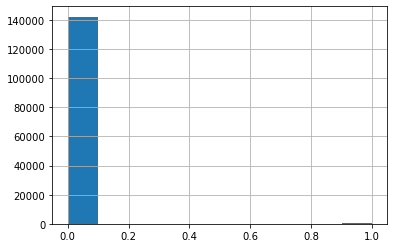

In [17]:
sampleData['Class'].hist()

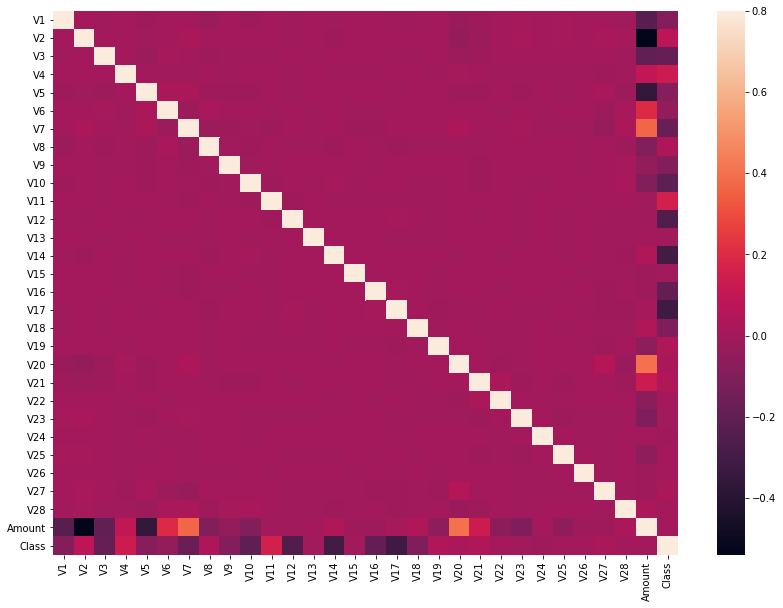

In [18]:
# from the heat map we can see that the features do not correleate to
# with other features.
corrmat = sampleData.corr()
fig = plt.figure(figsize = (14, 10)) 
sns.heatmap(corrmat, vmax = 0.8) 
plt.show() 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(sampleData, y, test_size=0.25, random_state=1)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(106803,)
(35601,)
(106803, 30)
(35601, 30)


In [20]:
# see the total number of fradulent transactions vs legitimate transactions
fraud = sampleData[sampleData['Class'] == 1] 
legitimate = sampleData[sampleData['Class'] == 0] 

print('Fraudulent transactions: ', len(data[data['Class'] == 1]))
print('Legitimate transactions: ', len(data[data['Class'] == 0]))

Fraudulent transactions:  492
Legitimate transactions:  284315


In [21]:
# Get an idea of the type of Fraudulent transactions
fraud['Amount'].describe() 

count     253.000000
mean      125.013399
std       247.961028
min         0.000000
25%         1.000000
50%        11.390000
75%       113.920000
max      1809.680000
Name: Amount, dtype: float64

In [22]:
### K-Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print(classification_report(y_test, y_pred))
print("Number of K Nearest Neighbors Classifier mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of K Nearest Neighbors Classifier mislabeled points out of a total 35601 points : 27


In [23]:
print(precision)
print(recall)
print(thresholds)

[0.00193815 0.90384615 1.        ]
[1.         0.68115942 0.        ]
[0 1]


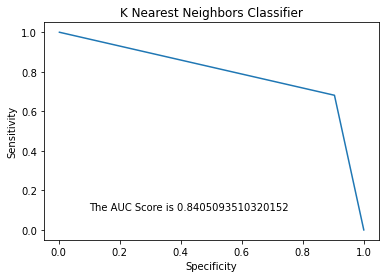

<Figure size 432x288 with 0 Axes>

In [24]:
knnplot = plt.title("K Nearest Neighbors Classifier")
knnplot = plt.xlabel("Specificity")
knnplot = plt.ylabel("Sensitivity")
knnroc = roc_auc_score(y_test, y_pred)
knnplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(knnroc))
knnplot = plt.plot (precision, recall)
knnplot = plt.figure()

In [25]:
print("The K Nearest Neighbors Classifier ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The K Nearest Neighbors Classifier ROC AUC Score is:  0.8405093510320152


In [14]:
print("The K Nearest Neighbors Classifier AP Score is: ", average_precision_score(y_test, y_pred))

The K Nearest Neighbors Classifier AP Score is:  0.5167295069730521


In [15]:
### Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("Number of Bernouolli Naive Bayes mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of Bernouolli Naive Bayes mislabeled points out of a total 35601 points : 4


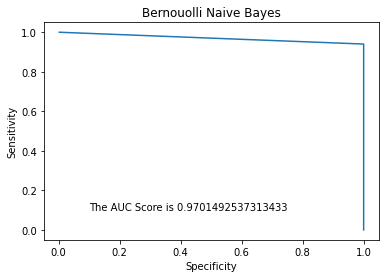

<Figure size 432x288 with 0 Axes>

In [16]:
bnbplot = plt.title("Bernouolli Naive Bayes")
bnbplot = plt.xlabel("Specificity")
bnbplot = plt.ylabel("Sensitivity")
bnbroc = roc_auc_score(y_test, y_pred)
bnbplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(bnbroc))
bnbplot = plt.plot (precision, recall)
bnbplot = plt.figure()

In [17]:
print("The Bernouolli Naive Bayes ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The Bernouolli Naive Bayes ROC AUC Score is:  0.9701492537313433


In [18]:
print("The Bernouolli Naive Bayes AP Score is: ", average_precision_score(y_test, y_pred))

The Bernouolli Naive Bayes AP Score is:  0.9404108638571699


In [19]:
### Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 2, random_state = 0)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print("Number of Random Forest Classifier mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of Random Forest Classifier mislabeled points out of a total 35601 points : 17


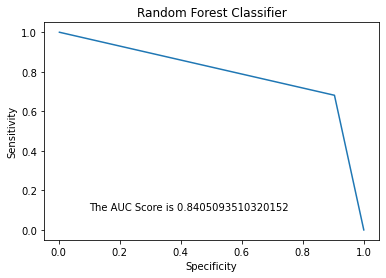

<Figure size 432x288 with 0 Axes>

In [26]:
rfcplot = plt.title("Random Forest Classifier")
rfcplot = plt.xlabel("Specificity")
rfcplot = plt.ylabel("Sensitivity")
rfcroc = roc_auc_score(y_test, y_pred)
rfcplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(rfcroc))
rfcplot = plt.plot (precision, recall)
rfcplot = plt.figure()

In [21]:
print("The Random Forest Classifier ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The Random Forest Classifier ROC AUC Score is:  0.8731343283582089


In [22]:
print("The Random Forest Classifier AP Score is: ", average_precision_score(y_test, y_pred))

The Random Forest Classifier AP Score is:  0.746746171392972


In [23]:
### K-Means

from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=0).fit(X_train, y_train).predict(X_test)
print("Number of K-Means mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of K-Means mislabeled points out of a total 35601 points : 697


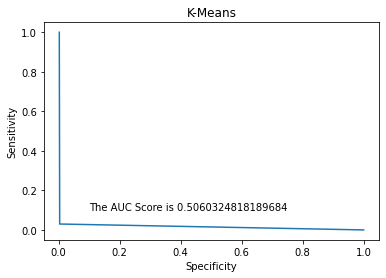

<Figure size 432x288 with 0 Axes>

In [24]:
kmeanplot = plt.title("K-Means")
kmeanplot = plt.xlabel("Specificity")
kmeanplot = plt.ylabel("Sensitivity")
kmeanroc = roc_auc_score(y_test, y_pred)
kmeanplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(kmeanroc))
kmeanplot = plt.plot (precision, recall)
kmeanplot = plt.figure()

In [25]:
print("The K-Means ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The K-Means ROC AUC Score is:  0.5060324818189684


In [26]:
print("The K-Means AP Score is: ", average_precision_score(y_test, y_pred))

The K-Means AP Score is:  0.0019199578023683316


In [27]:
### Support Vector Machine

from sklearn import svm
svmmodel = svm.SVC()
y_pred = svmmodel.fit(X_train, y_train).predict(X_test)
print("Number of Support Vector Machine mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of Support Vector Machine mislabeled points out of a total 35601 points : 58


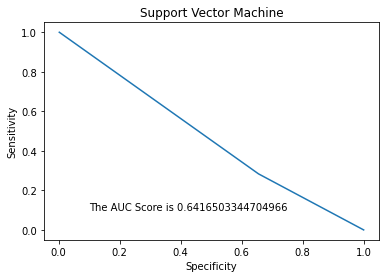

<Figure size 432x288 with 0 Axes>

In [28]:
svmmodelplot = plt.title("Support Vector Machine")
svmmodelplot = plt.xlabel("Specificity")
svmmodelplot = plt.ylabel("Sensitivity")
svmmodelroc = roc_auc_score(y_test, y_pred)
svmmodelplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(svmmodelroc))
svmmodelplot = plt.plot (precision, recall)
svmmodelplot = plt.figure()

In [29]:
print("The Support Vector Machine ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The Support Vector Machine ROC AUC Score is:  0.6416503344704966


In [30]:
print("The Support Vector Machine AP Score is: ", average_precision_score(y_test, y_pred))

The Support Vector Machine AP Score is:  0.18714343885423193


In [27]:
### Passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
y_pred = pac.fit(X_train, y_train).predict(X_test)
print("Number of Passive Aggressive Classifier mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of Passive Aggressive Classifier mislabeled points out of a total 35601 points : 0


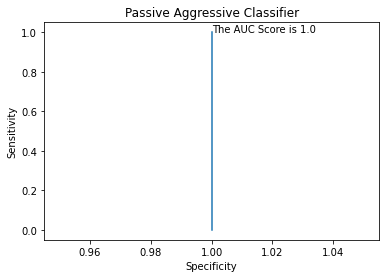

<Figure size 432x288 with 0 Axes>

In [28]:
pacplot = plt.title("Passive Aggressive Classifier")
pacplot = plt.xlabel("Specificity")
pacplot = plt.ylabel("Sensitivity")
pacroc = roc_auc_score(y_test, y_pred)
pacplot = plt.text(1, 1, "The AUC Score is {}".format(pacroc))
pacplot = plt.plot (precision, recall)
pacplot = plt.figure()

In [29]:
print("The Passive Aggressive Classifier ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The Passive Aggressive Classifier ROC AUC Score is:  1.0


In [30]:
print("The Passive Aggressive Classifier AP Score is: ", average_precision_score(y_test, y_pred))

The Passive Aggressive Classifier AP Score is:  1.0


In [31]:
### Perceptron

from sklearn.linear_model import Perceptron
per = Perceptron(tol=1e-3, random_state=0)
y_pred = per.fit(X_train, y_train).predict(X_test)
print("Number of Perceptron mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Number of Perceptron mislabeled points out of a total 35601 points : 32


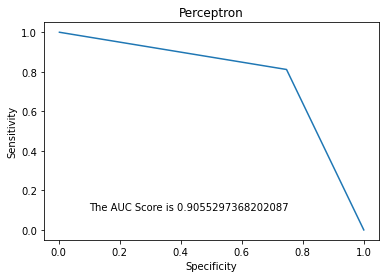

<Figure size 432x288 with 0 Axes>

In [32]:
perplot = plt.title("Perceptron")
perplot = plt.xlabel("Specificity")
perplot = plt.ylabel("Sensitivity")
perroc = roc_auc_score(y_test, y_pred)
perplot = plt.text(0.1, 0.1, "The AUC Score is {}".format(perroc))
perplot = plt.plot (precision, recall)
perplot = plt.figure()

In [33]:
print("The Perceptron ROC AUC Score is: ", roc_auc_score(y_test, y_pred))

The Perceptron ROC AUC Score is:  0.9055297368202087


In [38]:
print("The Perceptron AP Score is: ", average_precision_score(y_test, y_pred))

The Perceptron AP Score is:  0.4779209203833365


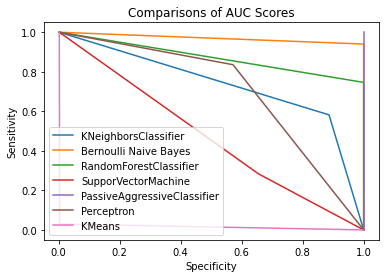

In [40]:
### Comparison Graph of all Classifiers

plt.figure()

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
y_pred = knn.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="KNeighborsClassifier")

bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="Bernoulli Naive Bayes")

rfc = RandomForestClassifier(max_depth = 2, random_state = 0)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="RandomForestClassifier")

svmmodel = svm.SVC()
y_pred = svmmodel.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="SupporVectorMachine")

pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
y_pred = pac.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="PassiveAggressiveClassifier")

per = Perceptron(tol=1e-3, random_state=0)
y_pred = per.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="Perceptron")

kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit(X_train, y_train).predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label="KMeans")

plt.title("Comparisons of AUC Scores")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc="lower left")
plt.show()